In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
aa_chars = ['L', 'K', 'M', 'F']

aa2charge = {'L':0, 'K':1, 'M':-1, 'F':-.2}
aa2volume = {'L':0.1, 'K':0.13, 'M':0.11, 'F':0.12}

pore_length_in_aa = 20

In [6]:
zero_charge_test_sequence = ['L' for _ in range(10)]
constant_charge_test_sequence = ['K' for _ in range(10)]

In [7]:
short_test_sequence = [x for x in 'LKMF']
short_test_charge = [aa2charge[x] for x in short_test_sequence]
short_test_volume = [aa2volume[x] for x in short_test_sequence]
print(short_test_sequence)
print(short_test_charge)
print(short_test_volume)

['L', 'K', 'M', 'F']
[0, 1, -1, -0.2]
[0.1, 0.13, 0.11, 0.12]


In [71]:
np.random.seed(42)
long_random_test_sequence = np.random.choice(aa_chars, 100)
long_random_test_charge = [aa2charge[x] for x in long_random_test_sequence]
long_random_test_volume = [aa2volume[x] for x in long_random_test_sequence]

In [72]:
#get charge in pore vs aa position
#pad the sequence with zero
#find the charge in the pore vs position
#output charge in the pore vs postion



In [73]:
def charge_sequence_from_aa_chars(aa_char_sequence, aa2charge):
    return [aa2charge[x] for x in aa_char_sequence]

def volume_sequence_from_aa_chars(aa_char_sequence, aa2volume):
    return [aa2volume[x] for x in aa_char_sequence]

def zero_pad_sequence(sequence, pore_length_in_aa):
    return [0]*pore_length_in_aa + sequence + [0]*pore_length_in_aa

sequence = short_test_sequence
charge_sequence = charge_sequence_from_aa_chars(sequence, aa2charge)
volume_sequence = volume_sequence_from_aa_chars(sequence, aa2volume)
padded_sequence = zero_pad_sequence(sequence=charge_sequence, pore_length_in_aa=pore_length_in_aa)

In [74]:
def get_charge_in_pore_vs_aa_idx(aa_char_sequence, aa2charge, pore_length_in_aa):
    charge_sequence = charge_sequence_from_aa_chars(aa_char_sequence, aa2charge)
    padded_charge_sequence = zero_pad_sequence(charge_sequence, pore_length_in_aa)
    
    charge_in_pore_vs_idx = []
    for aa_idx in range(0, len(padded_charge_sequence) - pore_length_in_aa):
        charge_in_pore = sum(padded_charge_sequence[aa_idx: aa_idx+pore_length_in_aa])
        charge_in_pore_vs_idx.append(charge_in_pore)
    return charge_in_pore_vs_idx

def get_volume_in_pore_vs_aa_idx(aa_char_sequence, aa2volume, pore_length_in_aa):
    volume_sequence = volume_sequence_from_aa_chars(aa_char_sequence, aa2volume)
    padded_volume_sequence = zero_pad_sequence(volume_sequence, pore_length_in_aa)
    
    volume_in_pore_vs_idx = []
    for aa_idx in range(0, len(padded_volume_sequence) - pore_length_in_aa):
        volume_in_pore = sum(padded_volume_sequence[aa_idx: aa_idx+pore_length_in_aa])
        volume_in_pore_vs_idx.append(volume_in_pore)
    return volume_in_pore_vs_idx


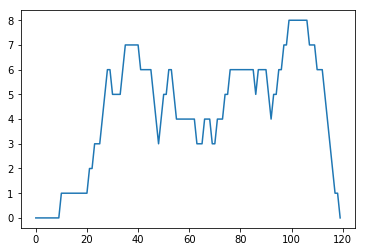

In [75]:
plt.plot(get_charge_in_pore_vs_aa_idx(long_random_test_sequence, aa2charge, pore_length_in_aa))
plt.show()

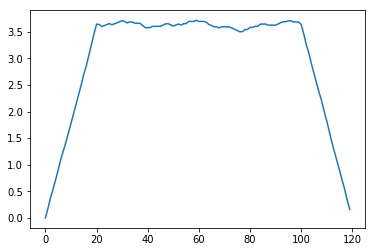

In [76]:
plt.plot(get_volume_in_pore_vs_aa_idx(long_random_test_sequence, aa2volume, pore_length_in_aa))
plt.show()

In [77]:
data_table = pd.read_csv('../data_raw/tau_sequence_data_2020-07-12.csv')
data_table.head(10)

,Position,Unnamed: 1,Residue,Charge,MW,Volume
0,1,NaN,M,0.0,149.21,0.180843
1,2,NaN,A,0.0,89.09,0.107977
2,3,NaN,E,-1.0,147.13,0.178322
3,4,NaN,P,0.0,115.13,0.139538
4,5,NaN,R,1.0,174.20,0.211130
5,6,NaN,Q,0.0,146.15,0.177134
6,7,NaN,E,-1.0,147.13,0.178322
7,8,NaN,F,0.0,165.19,0.200210
8,9,NaN,E,-1.0,147.13,0.178322
9,10,NaN,V,0.0,117.15,0.141986


In [78]:
sequence = data_table['Residue']
charge_sequence = data_table['Charge']
volume_sequence = data_table['Volume']

In [79]:
#build aa2charge mapping
aa2charge = {aa:charge for aa, charge in zip(sequence, charge_sequence)}
aa2volume = {aa:volume for aa, volume in zip(sequence, volume_sequence)}

In [80]:
28/0.33

84.84848484848484

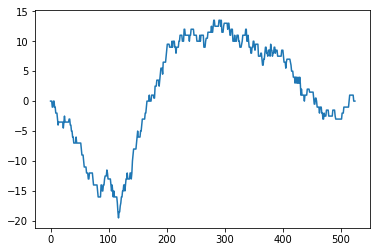

In [81]:
plt.plot(get_charge_in_pore_vs_aa_idx(sequence, aa2charge, pore_length_in_aa=84))
plt.show()

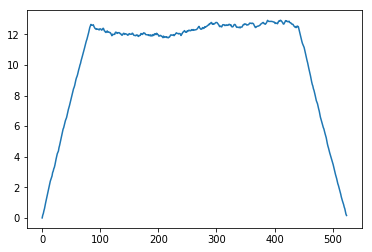

In [69]:
plt.plot(get_volume_in_pore_vs_aa_idx(sequence, aa2volume, pore_length_in_aa=84))
plt.show()